<a href="https://colab.research.google.com/github/zar373/Telecom_Churn_Analysis/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

In [3]:
tel_df= pd.read_csv("/content/sample_data/Cleaned_Telecom_Dataset_int.csv")
tel_df

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,84.80,1990.50,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,7039,0,103.20,7362.90,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,7040,0,29.60,346.45,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,7041,1,74.40,306.60,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


In [4]:
tel_df= tel_df.drop("Unnamed: 0", axis= 1)
tel_df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
scaler.fit(tel_df.drop(['Churn'], axis = 1))
scaled_features = scaler.transform(tel_df.drop('Churn',axis = 1))

# Feature Selection

In [7]:
X= scaled_features
y= tel_df["Churn"]

#Logistic Regression with Python Package without Smote

## Train Test Split

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 44, test_size= 0.3)

In [9]:
lgmod= LogisticRegression(max_iter=1000000, solver='newton-cg')
lgmod.fit(X_train, y_train)

LogisticRegression(max_iter=1000000, solver='newton-cg')

In [10]:
y_pred= lgmod.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [11]:
print("The Classification Report for the Logistic Regression model is:")
print(classification_report(y_test, y_pred))

The Classification Report for the Logistic Regression model is:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1534
           1       0.66      0.52      0.58       576

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



##Confusion Matrix With Visualization


In [12]:
cm= confusion_matrix(y_test, y_pred)
print("Following is the Confusion Matrix for the Logistic Regression is: ")
print(cm)

Following is the Confusion Matrix for the Logistic Regression is: 
[[1379  155]
 [ 274  302]]


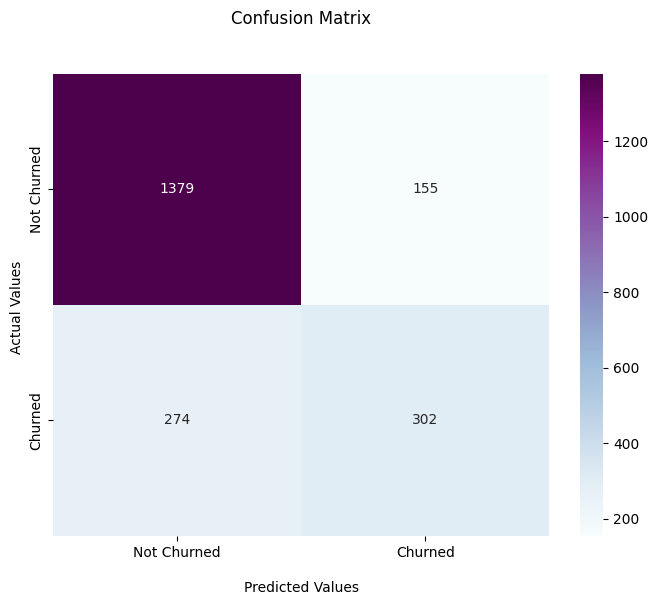

In [13]:
plt.figure(figsize=(8, 6))

ax = sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churned','Churned'])
ax.yaxis.set_ticklabels(['Not Churned','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

##Mean Square Error

In [14]:
mse = mean_squared_error(y_test, y_pred)
mse

0.2033175355450237

##Accuracy

In [15]:
score= lgmod.score(X_train, y_train)
print(f"The score of the Logistic Regression model is: {score}")

The score of the Logistic Regression model is: 0.8027224705404307


In [16]:
accuracy= accuracy_score(y_test, y_pred)
print(f"The accuracy of the Logistic Regression model is: {accuracy}")

The accuracy of the Logistic Regression model is: 0.7966824644549763


#Logistic Regression With Python Package With SMOTE

In [17]:
sm = SMOTE(random_state=42)
sm = SMOTEENN(smote = sm)
X_resampled, y_resampled = sm.fit_resample(X,y)

## Train Test Split

In [18]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state = 42)

In [19]:
lgmod_smote= LogisticRegression(max_iter=1000000, solver='newton-cg')
lgmod_smote.fit(Xr_train, yr_train)

LogisticRegression(max_iter=1000000, solver='newton-cg')

In [20]:
yr_pred= lgmod_smote.predict(Xr_test)
yr_pred

array([1, 1, 1, ..., 1, 1, 1])

##Mean Sqaure Error

In [21]:
mse = mean_squared_error(yr_test, yr_pred)
mse

0.09536216779572694

##Accruracy

In [22]:
score= lgmod_smote.score(Xr_train, yr_train)

In [23]:
accuracy= accuracy_score(yr_test, yr_pred)
print(f"The accuracy of the Logistic Regression model is: {accuracy}")

The accuracy of the Logistic Regression model is: 0.9046378322042731


##Confusion Matrix With Visualization

The Confusion Matrix of the Logistic Regression with SMOTE is: [[743  96]
 [ 87 993]]


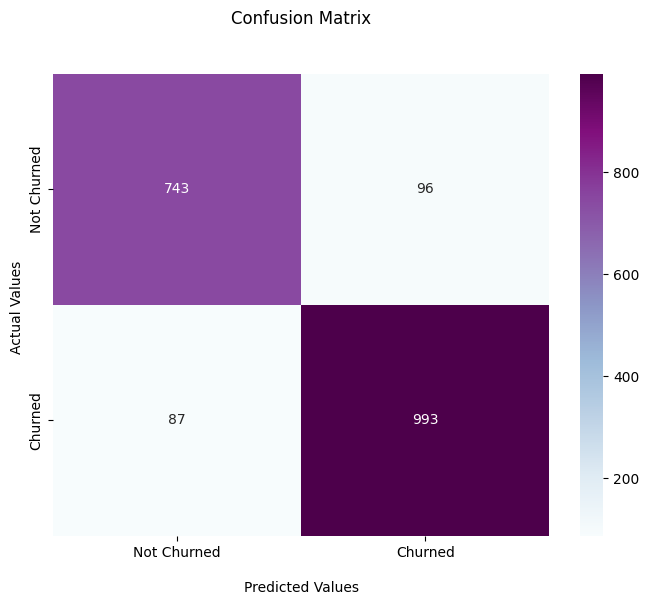

In [24]:
cm= confusion_matrix(yr_test, yr_pred)

print(f'The Confusion Matrix of the Logistic Regression with SMOTE is: {cm}')

plt.figure(figsize=(8, 6))

ax = sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churned','Churned'])
ax.yaxis.set_ticklabels(['Not Churned','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()


##Classification Report

#Logistic Regression without Python Package without SMOTE

We will apply the Logistic Regression by calculating the value of theta through Gradient Descent Method.

In [41]:


# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings( "ignore" )

# to compare our model's accuracy with sklearn model
from sklearn.linear_model import LogisticRegression
# Logistic Regression
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Function for model training
    def fit( self, X, Y ) :
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
        # weight initialization
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y

        # gradient descent learning

        for i in range( self.iterations ) :
            self.update_weights()
        return self

    # Helper function to update weights in gradient descent

    def update_weights( self ) :
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )

        # calculate gradients
        tmp = ( A - self.Y.T )
        tmp = np.reshape( tmp, self.m )
        dW = np.dot( self.X.T, tmp ) / self.m
        db = np.sum( tmp ) / self.m

        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return self

    # Hypothetical function  h( x )

    def predict( self, X ) :
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )
        Y = np.where( Z > 0.5, 1, 0 )
        return Y


# Driver code

def main() :

    # Importing dataset
    df = pd.read_csv( "/content/sample_data/Cleaned_Telecom_Dataset_int.csv" )
    X = df.iloc[:,:-1].values
    Y = df.iloc[:,-1:].values

    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 0.3, random_state = 0 )

    # Model training
    model = LogitRegression( learning_rate = 0.04, iterations = 1000 )

    model.fit( X_train, Y_train )
    model1 = LogisticRegression()
    model1.fit( X_train, Y_train)

    # Prediction on test set
    Y_pred = model.predict( X_test )
    Y_pred1 = model1.predict( X_test )

    # measure performance
    correctly_classified = 0
    correctly_classified1 = 0

    # counter
    count = 0
    for count in range( np.size( Y_pred ) ) :

        if Y_test[count] == Y_pred[count] :
            correctly_classified = correctly_classified + 1

        if Y_test[count] == Y_pred1[count] :
            correctly_classified1 = correctly_classified1 + 1

        count = count + 1

    print( "Accuracy on test set by our model       :  ", (
      correctly_classified / count ) * 100 )
    print( "Accuracy on test set by sklearn model   :  ", (
      correctly_classified1 / count ) * 100 )


if __name__ == "__main__" :
    main()

Accuracy on test set by our model       :   69.09952606635072
Accuracy on test set by sklearn model   :   99.95260663507109


In [42]:

yr_test_report = np.array(y_test)
pred_report = np.array(y_test_pred)

counts = {
    'TP': {0: 0, 1: 0},
    'FP': {0: 0, 1: 0},
    'TN': {0: 0, 1: 0},
    'FN': {0: 0, 1: 0}
}

for yt, yp in zip(yr_test_report, pred_report):
    if yt == yp:
        counts['TP'][yt] += 1
        counts['TN'][1 - yt] += 1
    else:
        counts['FP'][yp] += 1
        counts['FN'][yt] += 1

# Initialize metrics
metrics = {
    'precision': {0: 0, 1: 0},
    'recall': {0: 0, 1: 0},
    'f1_score': {0: 0, 1: 0},
    'accuracy': 0
}

# Calculate Precision, Recall, and F1 Score for both classes
for cls in [0, 1]:
    TP = counts['TP'][cls]
    FP = counts['FP'][cls]
    FN = counts['FN'][cls]
    TN = counts['TN'][cls]

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    metrics['precision'][cls] = precision
    metrics['recall'][cls] = recall
    metrics['f1_score'][cls] = f1_score

# Calculate overall accuracy correctly
total_correct = sum(counts['TP'].values())  # Only sum true positives for both classes
total_predictions = len(yr_test)  # Total predictions (both classes)
metrics['accuracy'] = total_correct / total_predictions

print(f"Accuracy: {metrics['accuracy']}")
print(f"Precision for class 0: {metrics['precision'][0]}")
print(f"Recall for class 0: {metrics['recall'][0]}")
print(f"F1 Score for class 0: {metrics['f1_score'][0]}")
print(f"Precision for class 1: {metrics['precision'][1]}")
print(f"Recall for class 1: {metrics['recall'][1]}")
print(f"F1 Score for class 1: {metrics['f1_score'][1]}")


Accuracy: 0.001563314226159458
Precision for class 0: 1.0
Recall for class 0: 1.0
F1 Score for class 0: 1.0
Precision for class 1: 1.0
Recall for class 1: 1.0
F1 Score for class 1: 1.0


##Train Test Split

##Mean Square Error


##Accuracy

##Classification Report

#Logistic Regression without Python Package without SMOTE

##Train Test Split

##Mean Square Error

##Accuracy

##Confusion Matrix with Visualization

##Classification Report